# 3.2 Алгоритм обратного распространения ошибки

# ВОПРОС

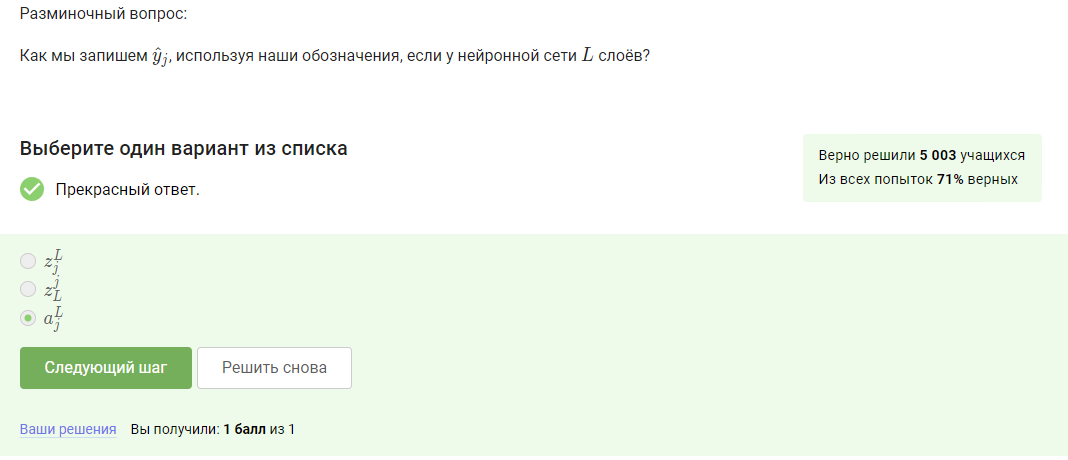

# ВОПРОС 

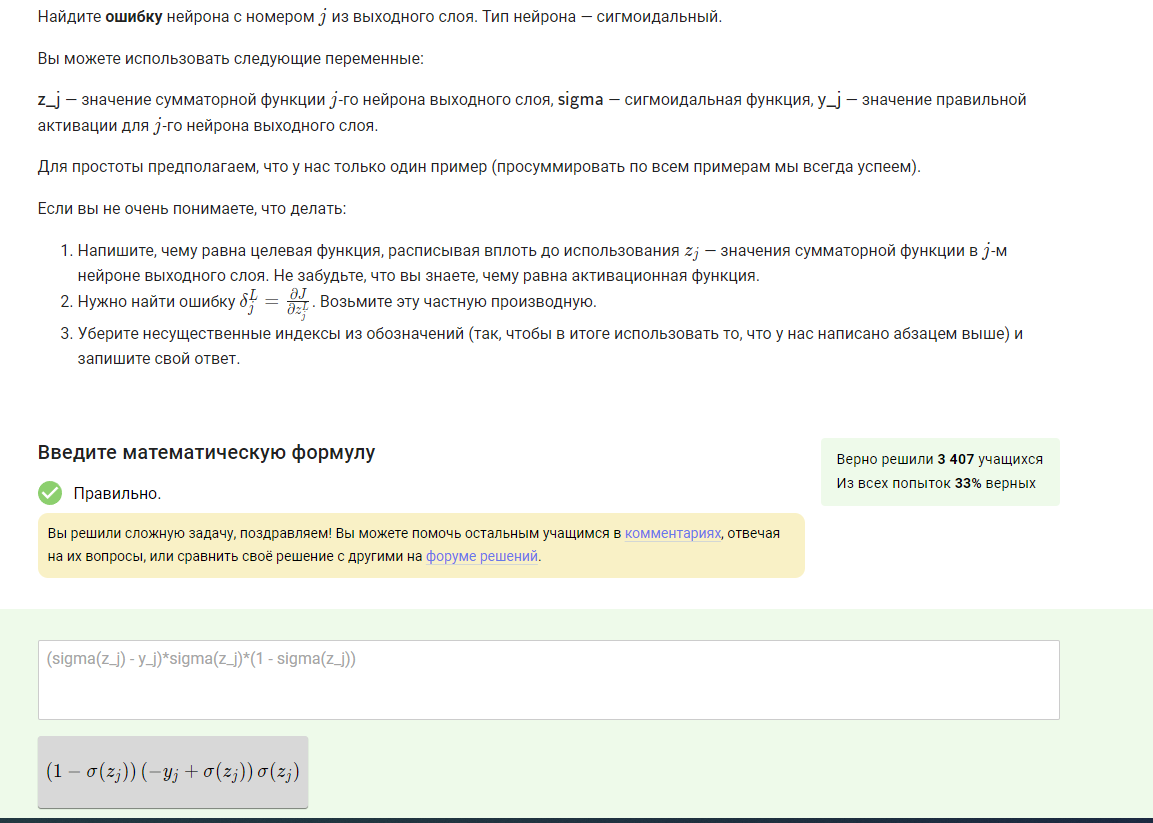

# ВОПРОС

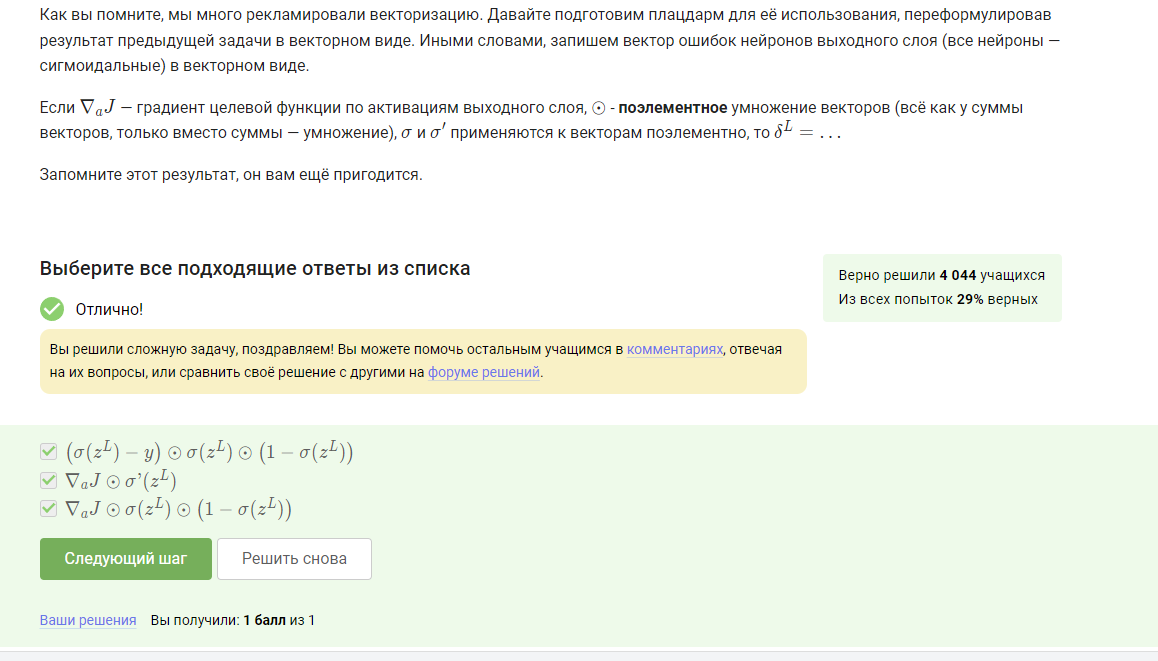

# ВОПРОС

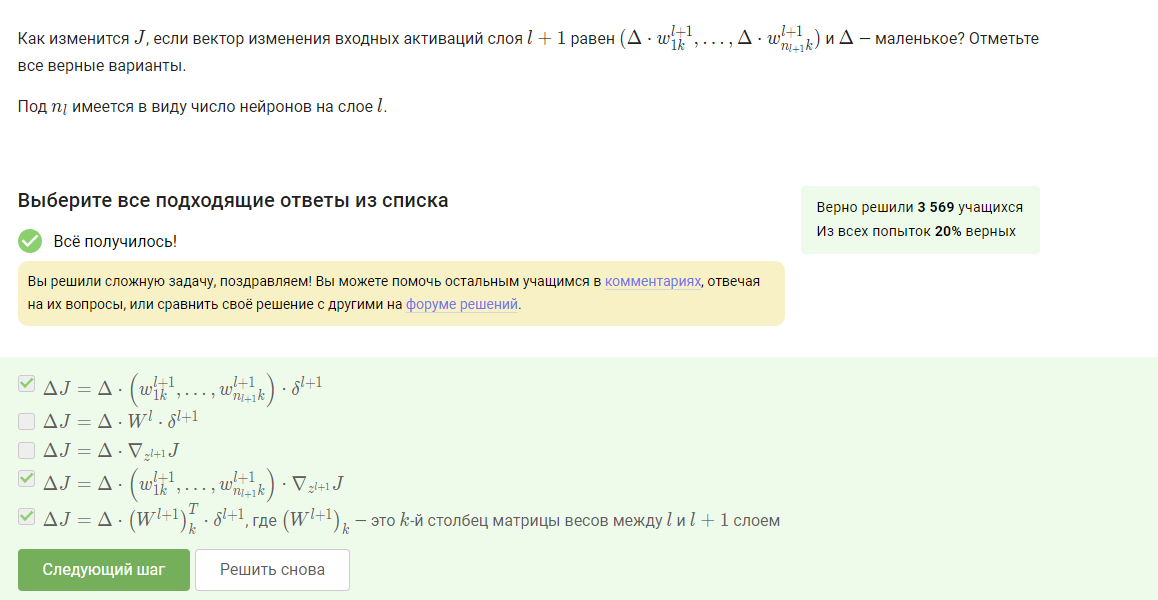

# ВОПРОС

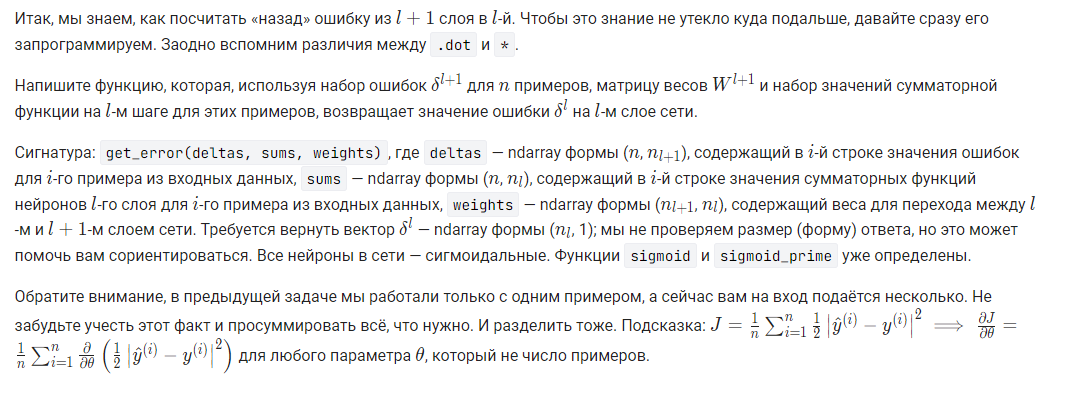

In [ ]:
import numpy as np
def get_error(deltas, sums, weights):
    """
    compute error on the previous layer of network
    deltas - ndarray of shape (n, n_{l+1})
    sums - ndarray of shape (n, n_l)
    weights - ndarray of shape (n_{l+1}, n_l)
    """
    # here goes your code
    n, nl = sums.shape
    return (deltas.dot(weights)*sigmoid_prime(sums)).mean(axis = 0).reshape((nl,1))

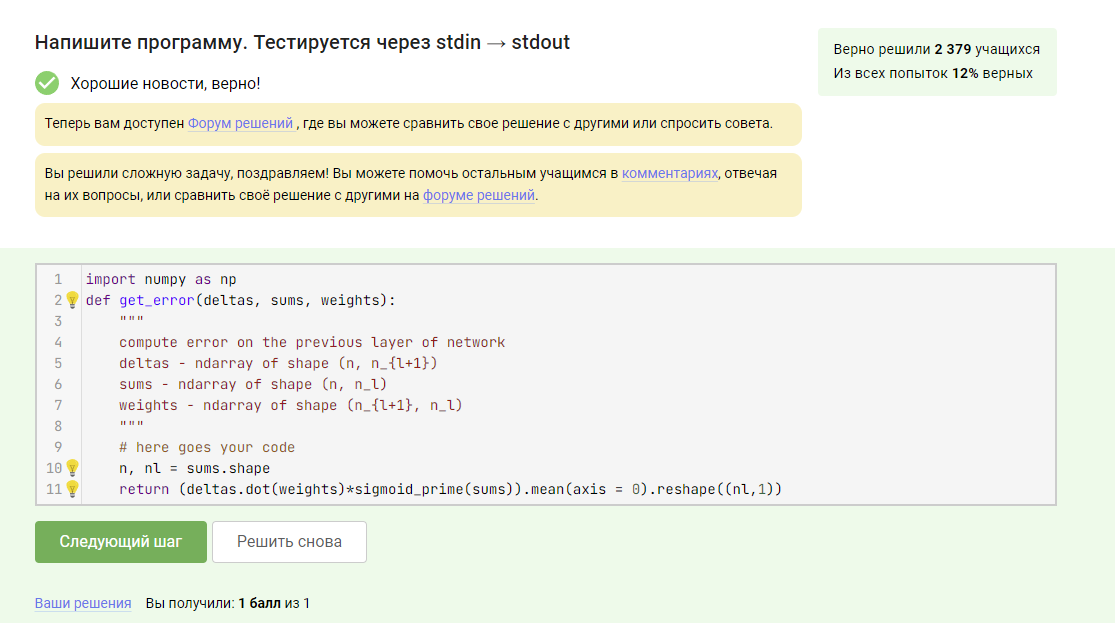

In [ ]:
import numpy as np
def get_error(deltas, sums, weights):
    return np.mean(deltas @ weights * sigmoid_prime(sums), axis=0)

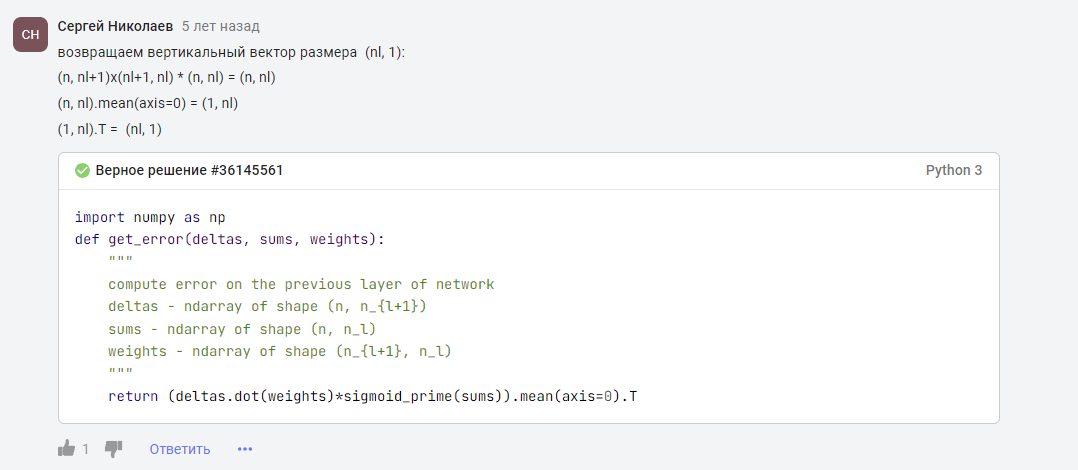

# ВОПРОС

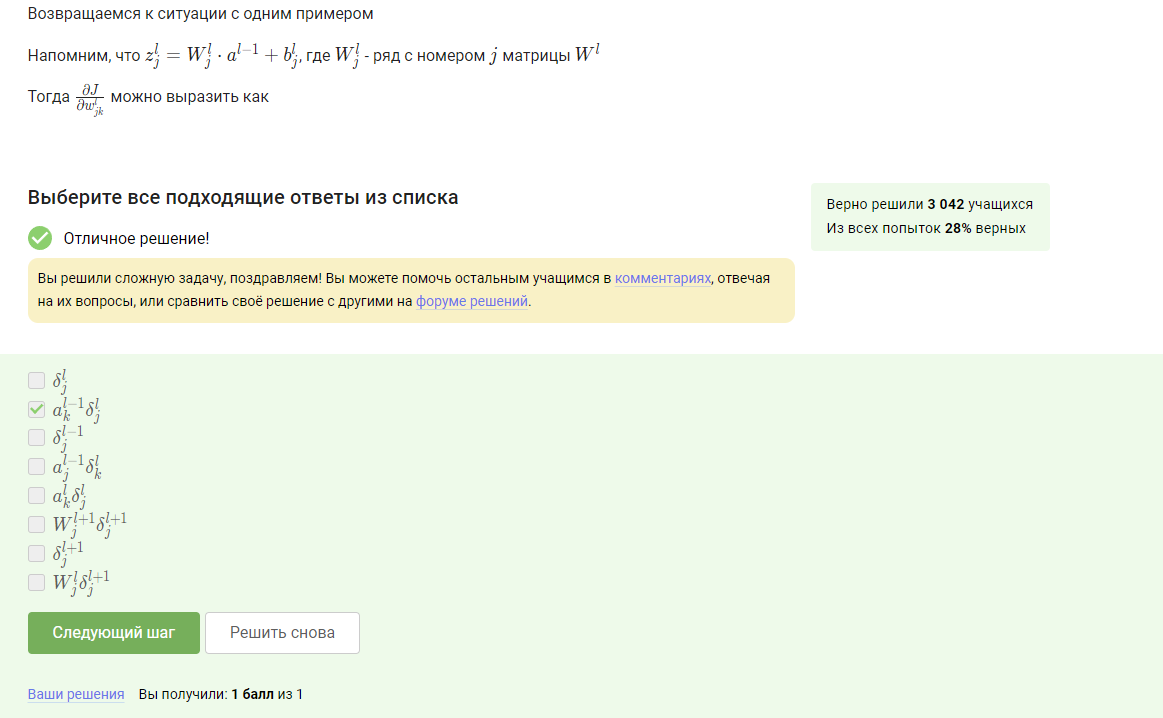

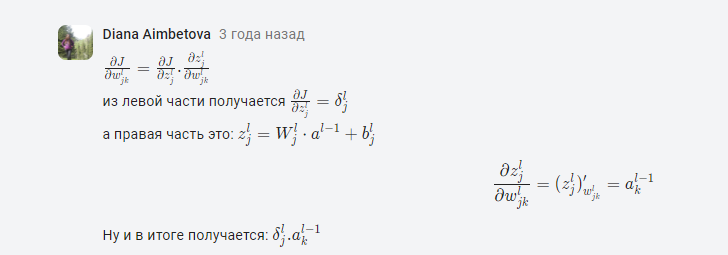

# ВОПРОС

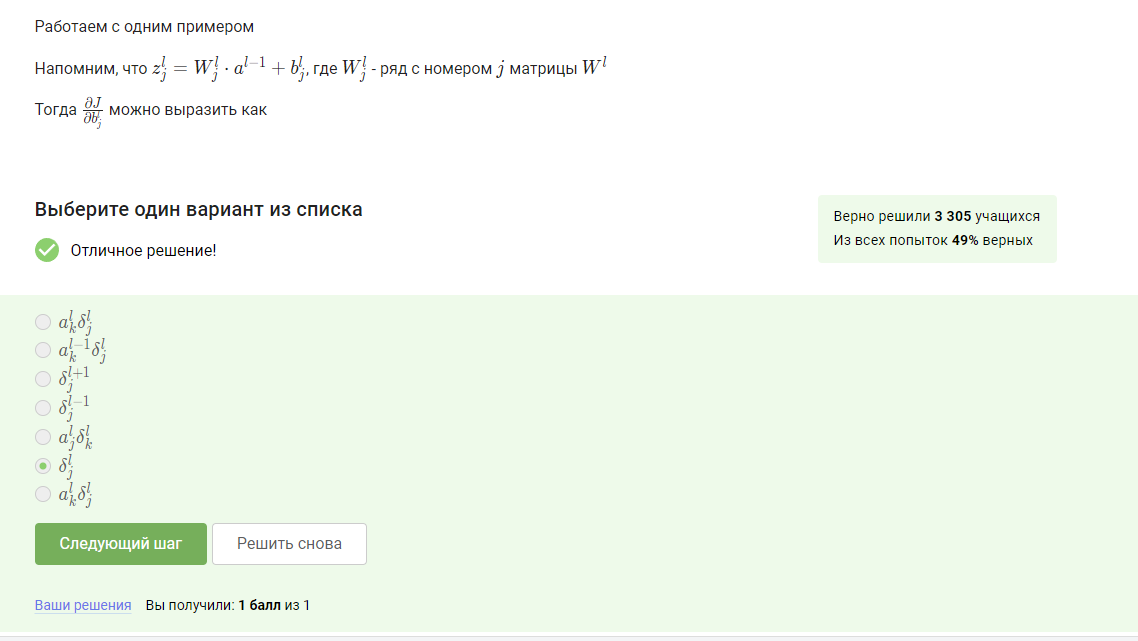

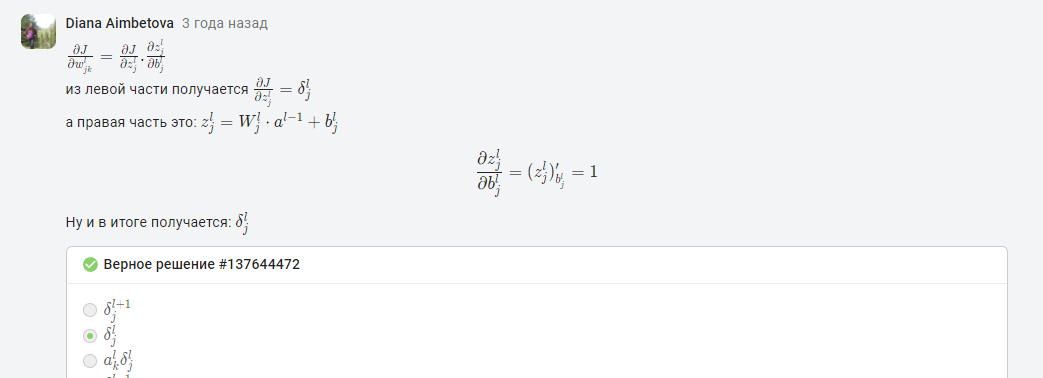

# ИЗ КОНСПЕКТА

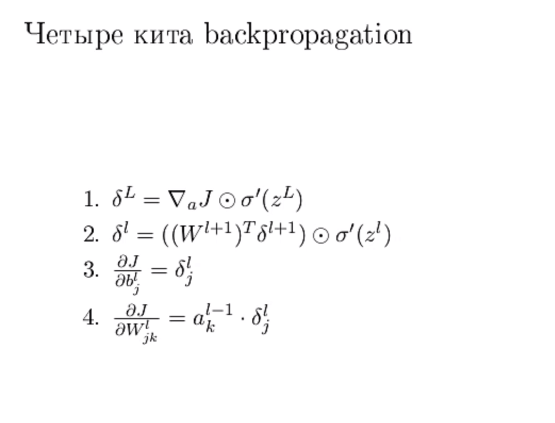


# ВОПРОС

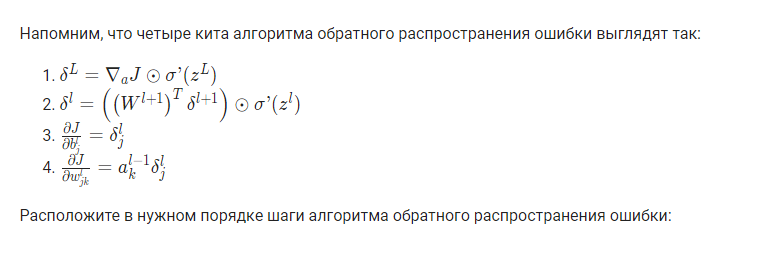

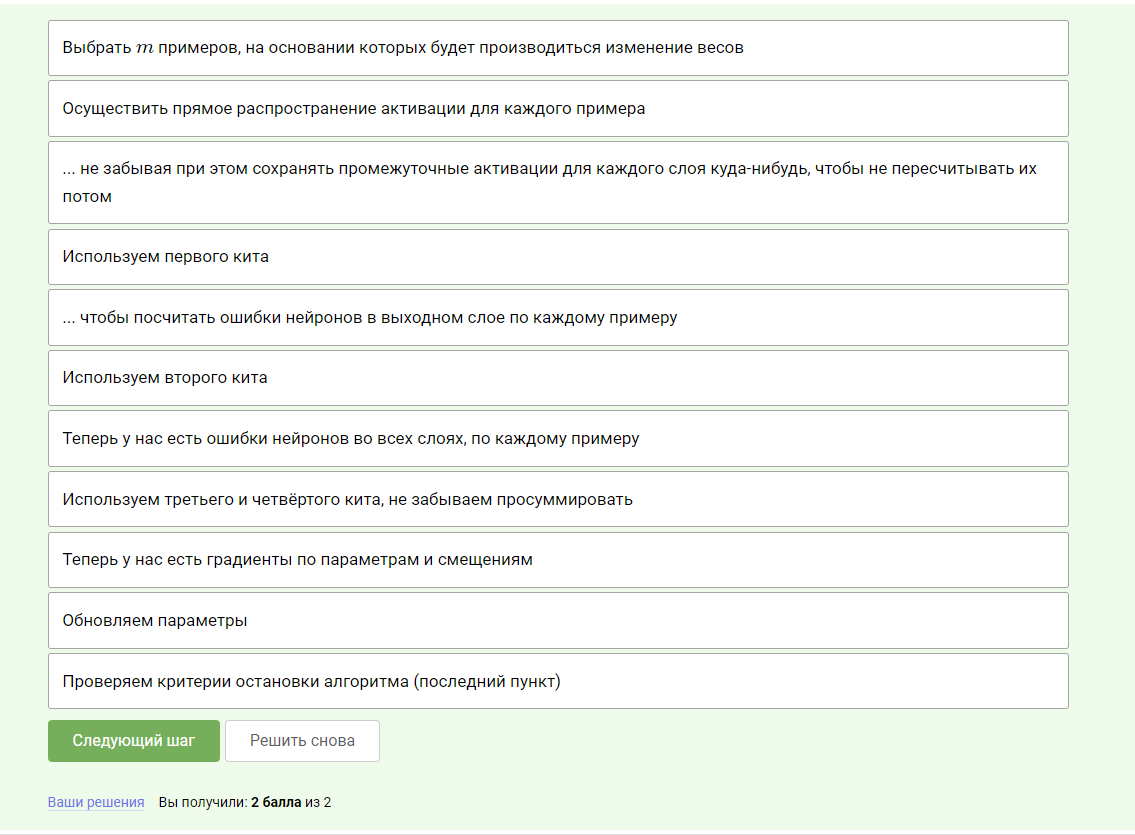

# ВОПРОС

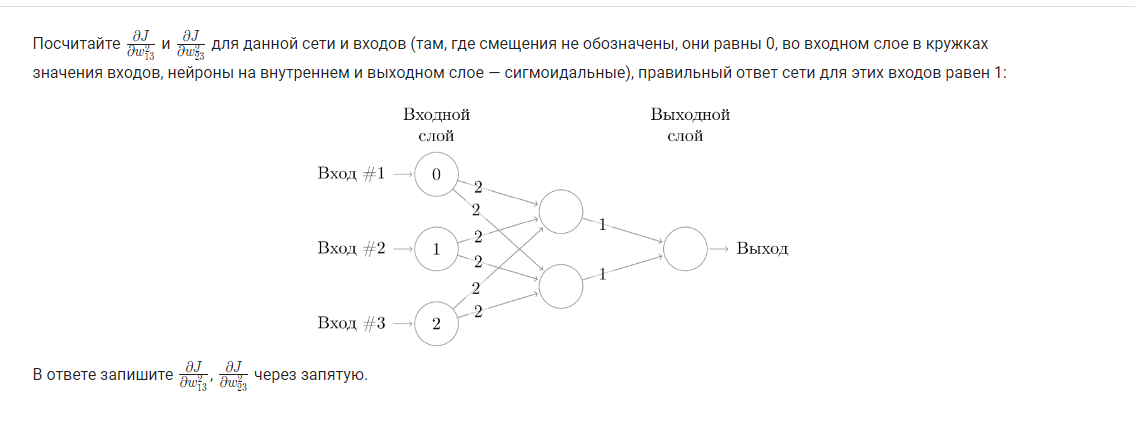

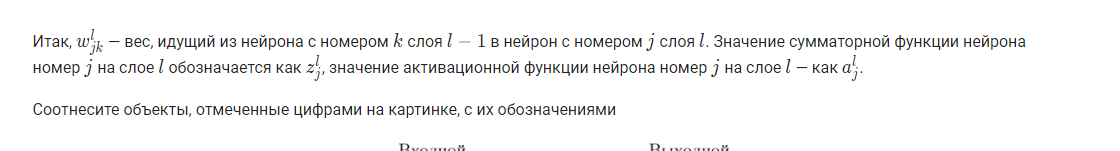

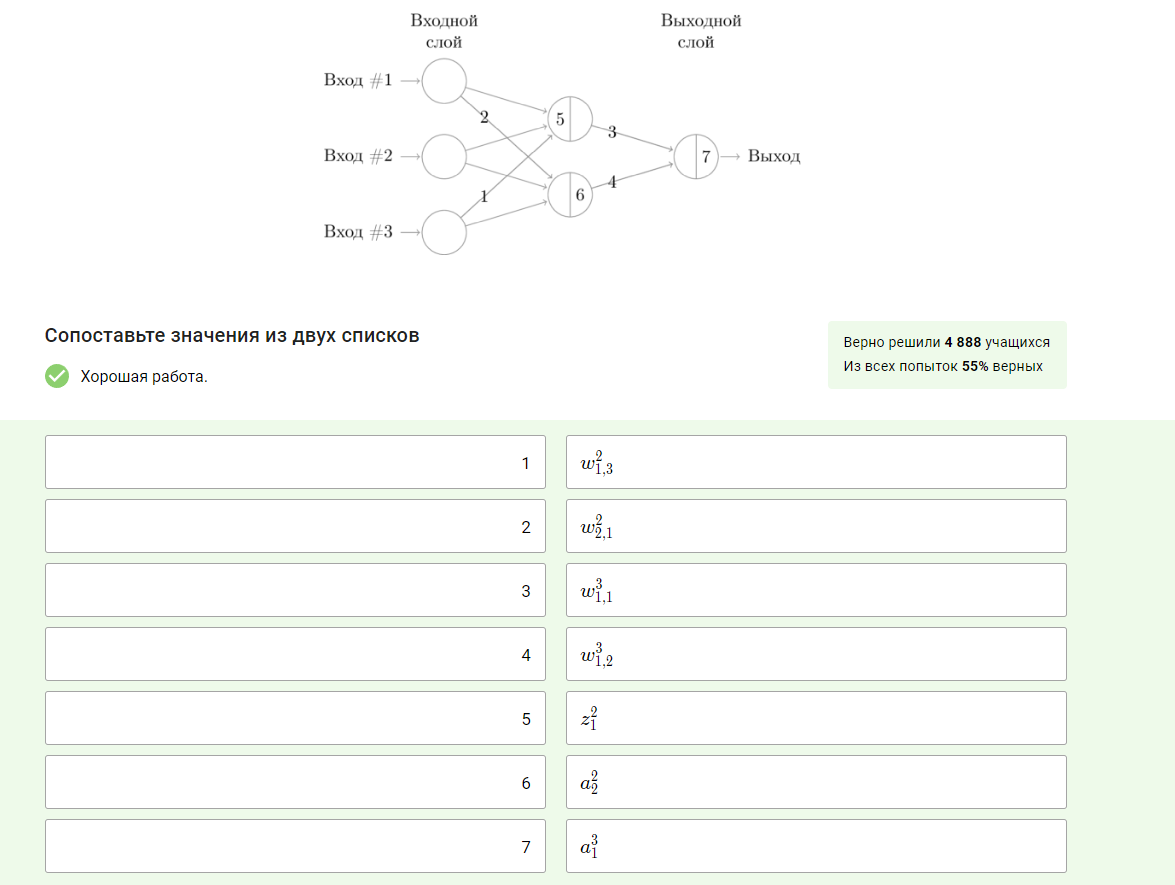

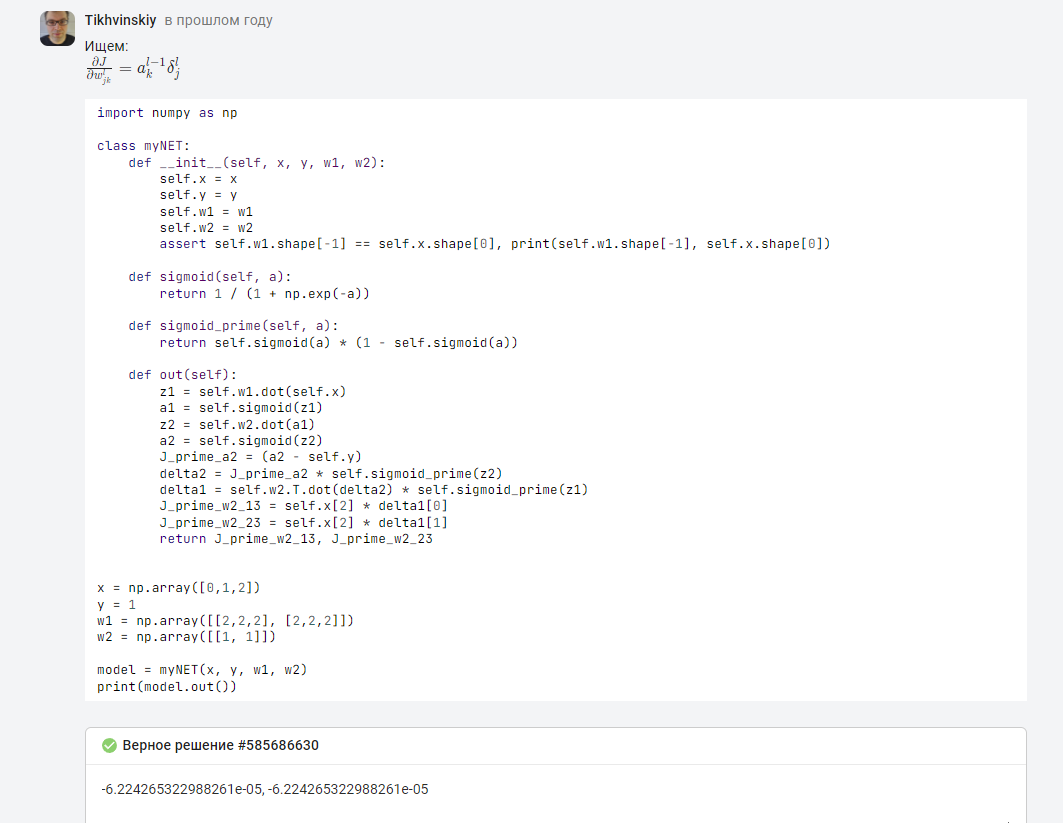

In [8]:
import numpy as np

class myNET:
    def __init__(self, x, y, w1, w2):
        self.x = x
        self.y = y
        self.w1 = w1
        self.w2 = w2
        assert self.w1.shape[-1] == self.x.shape[0], print(self.w1.shape[-1], self.x.shape[0])  
      
    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))
    
    def sigmoid_prime(self, a):
        return self.sigmoid(a) * (1 - self.sigmoid(a))
        
    def out(self):
        z1 = self.w1.dot(self.x)
        a1 = self.sigmoid(z1)
        z2 = self.w2.dot(a1)
        a2 = self.sigmoid(z2)
        J_prime_a2 = (a2 - self.y) 
        delta2 = J_prime_a2 * self.sigmoid_prime(z2)
        delta1 = self.w2.T.dot(delta2) * self.sigmoid_prime(z1)
        J_prime_w2_13 = self.x[2] * delta1[0] 
        J_prime_w2_23 = self.x[2] * delta1[1] 
        return J_prime_w2_13, J_prime_w2_23
        

x = np.array([0,1,2])
y = 1
w1 = np.array([[2,2,2], [2,2,2]])
w2 = np.array([[1, 1]])

model = myNET(x, y, w1, w2)
print(model.out())

(-6.224265322988261e-05, -6.224265322988261e-05)


In [3]:
# Потратил на этот степ около часа. Реализовывал нейронную сеть, чтобы было легче считать. 
# Функции grad_J_a, sigmoid_der думаю понятны из названия.

class Neuronet:
    
    def __init__(self):
        
        self.w1 = np.array([2,2,2,2,2,2]).reshape(2,3)
        self.w2 = np.array([1,1]).reshape(1,2)
        self.z = []
        self.a = []
        self.deltas = []
        
    def forward_prop(self,inputs):
        
        z_hid = self.w1.dot(inputs)
        a_hid = sigmoid(z_hid)
        z_out = self.w2.dot(a_hid)
        a_out = sigmoid(z_out)
        self.z.append(z_hid)
        self.z.append(z_out)
        
        self.a.append(inputs)
        self.a.append(a_hid)
        self.a.append(a_out)
        
        return a_out
    
    def backward_prop(self,preds,ans):
        
        delta2 = grad_J_a(preds,ans) * sigmoid_der(self.z[1])
        delta1 = self.w2.T.dot(delta2) * sigmoid_der(self.z[0])
        self.deltas.append(delta1)
        self.deltas.append(delta2)
        
    def w_der(self,l,j,k):
        return self.a[l-2][k-1]*self.deltas[l-2][j-1]


In [4]:
z = Neuronet

In [5]:
z

__main__.Neuronet

In [1]:
# код (подкорректированный), ниже вставлять значения по весам и инпуту
import numpy as np

class NN:
    def __init__(self, w1, w2):
        self.w1 = w1.reshape(2,3)
        self.w2 = w2.reshape(1,2)
        self.z = []
        self.a = []
        self.deltas = []
        
    def forward(self, inputs):
        self.a.append(inputs)
        
        z_0 = self.w1.dot(inputs)
        a_0 = self.sigmoid(z_0)
        z_1 = self.w2.dot(a_0)
        pred = self.sigmoid(z_1)
        
        self.z.append(z_0)
        self.a.append(a_0)
        self.z.append(z_1)
        self.a.append(pred)
        
        return pred
    
    def backward(self, pred, y):
        delta2 = self.grad_J_a(pred, y) * self.sigmoid_prime(self.z[1])
        delta1 = self.w2.T.dot(delta2) * self.sigmoid_prime(self.z[0])
        self.deltas.append(delta1)
        self.deltas.append(delta2)
        
    def w_der(self, l, j,k):
        return self.a[l-2][k-1]*self.deltas[l-2][j-1]
    
    def sigmoid(self, x):
        """сигмоидальная функция, работает и с числами, и с векторами (поэлементно)"""
        return 1 / (1 + np.exp(-x))

    def sigmoid_prime(self, x):
        """производная сигмоидальной функции, работает и с числами, и с векторами (поэлементно)"""
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def grad_J_a(self, pred, y):
        return pred - y



In [2]:
# После тупо вставлять значения
w1 = np.array([0.2, 0.2, 0.9, 0.3, 0.6, 0.7])
w2 = np.array([0.2, 0.5])
nn = NN(w1, w2)
nn.backward(nn.forward([15, 5, 15]), 1)
int(nn.w_der(2,1,3)), int(nn.w_der(2,2,3))

(0, 0)

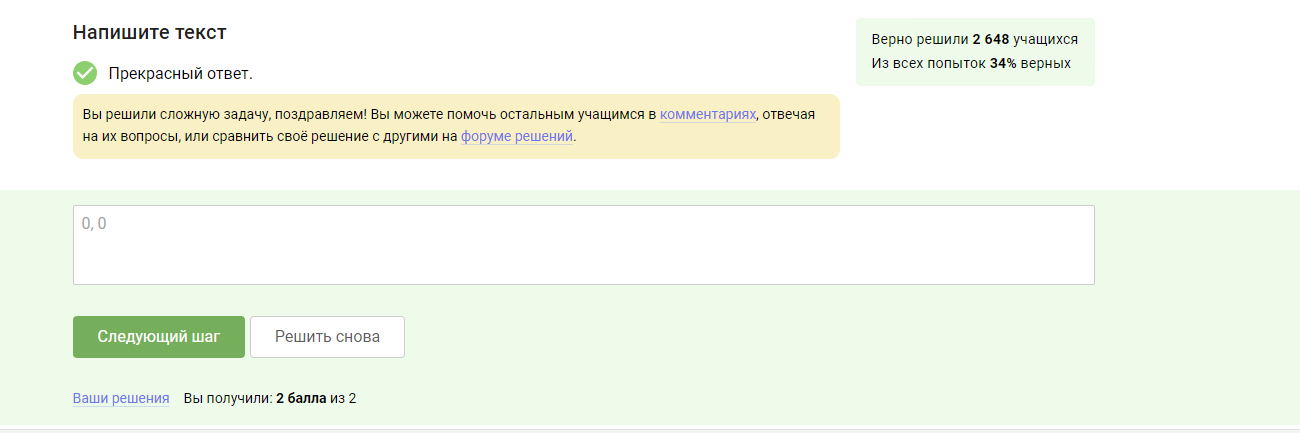

In [6]:
import numpy as np


class PrimeJwCounter:
    x = None
    y = None

    w1 = None
    w2 = None

    def __init__(self, x, y, w1, w2):
        self.x = np.array(x)
        self.y = np.array(y)

        self.w1 = np.array(w1)
        self.w2 = np.array(w2)

    def sigmoid(self, n):
        return 1 / (1 + np.exp(-n))

    def sigmoid_prime(self, n):
        return self.sigmoid(n) * (1 - self.sigmoid(n))

    def prime_j_w(self):
        z1 = self.x.dot(self.w1.T)
        a1 = self.sigmoid(z1)

        z2 = a1.dot(self.w2.T)
        a2 = self.sigmoid(z2)

        grad = (a2 - self.y)

        d2 = grad * self.sigmoid_prime(z2)
        d1 = d2.dot(self.w2) * self.sigmoid_prime(z1)

        return [self.x[0][2] * d1[0][0], self.x[0][2] * d1[0][1]]


result = PrimeJwCounter(x=[[0, 1, 2]], y=[[1]], w1=[[2, 2, 2], [2, 2, 2]], w2=[[1, 1]]).prime_j_w()
print(result)

[-6.224265322988261e-05, -6.224265322988261e-05]


In [7]:
def sigma(x):
    return np.exp(x) / (1 + np.exp(x))

def sigma_prime(x):
    return sigma(x) * (1 - sigma(x))

xs = np.array([[0,1,2]])
ys = np.array([[1]])

ws1 = np.array([[2,2,2],[2,2,2]])
ws2 = np.array([[1,1]])

z1 = xs.dot(ws1.T)
a1 = sigma(z1)

z2 = a1.dot(ws2.T)
a2 = sigma(z2)

grad_J_a2 = (a2 - ys)

d2 = grad_J_a2 * sigma_prime(z2)
d1 = d2.dot(ws2) * sigma_prime(z1)
d0 = d1.dot(ws1) * sigma_prime(xs)

print(xs[0][2] * d1[0][0])
print(xs[0][2] * d1[0][1])

-6.22426532298854e-05
-6.22426532298854e-05


# ВОПРОС

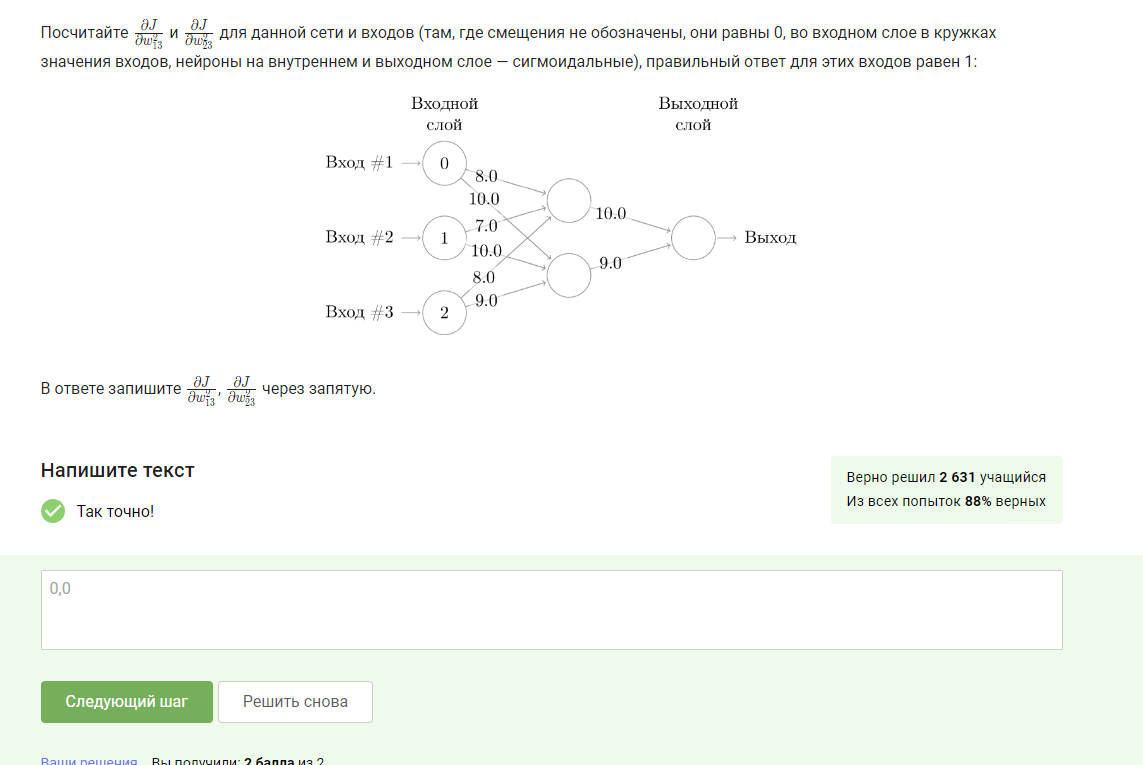

In [10]:
# как то не совсем верно
import numpy as np

class NeuronNetwork:
    def __init__(self, weights):
        self.weights = weights
        self.activation_values = []

    def activation(self, x):
        """сигмоидальная функция, работает и с числами, и с векторами (поэлементно)"""
        return 1 / (1 + np.exp(-x))

    def activation_derivative(self, activation_value):
        """производная сигмоидальной функции, работает и с числами, и с векторами (поэлементно)"""
        return activation_value * (1 - activation_value)

    def predict(self, a):
        for i in range(len(self.weights)):
            z = self.weights[i].T.dot(a)
            a = self.activation(z)
            self.activation_values.append(a)
        return a

    def J_quadratic(self, X, y):
        assert y.shape[1] == 1, 'Incorrect y shape'

        return 0.5 * np.mean((self.predict(X) - y) ** 2)

    def gradient(self, y_hat, y):
        assert y_hat.shape == y.shape and y_hat.shape[1] == 1, 'Incorrect shapes'

        return y_hat - y

    def train(self, X, y):
        a_L = self.predict(X)
        nabla_j = self.gradient(a_L, y)
        delta_l = nabla_j * self.activation_derivative(a_L)
        print(a_L)

        for i in range(len(self.activation_values) - 2, -1, -1):
            delta_l = self.weights[i+1].dot(delta_l)
            delta_l = delta_l * self.activation_derivative(self.activation_values[i])
            print(delta_l)




[[0.99999999]]
[[-3.22134047e-26]
 [-1.95348927e-28]]


In [11]:
weights = [
    np.array([[8, 10], [7, 10], [8, 9]]),
    np.array([[10], [9]])
]

network = NeuronNetwork(weights)
res = network.train(np.array([[0], [1], [2]]), np.array([[1]]))

[[0.99999999]]
[[-3.22134047e-26]
 [-1.95348927e-28]]


In [12]:
weights = [
    np.array([[0.2,0.2], [0.9,0.3], [0.6,0.7]]),
    np.array([[0.2], [0.5]])
]

network = NeuronNetwork(weights)
res = network.train(np.array([[0], [1], [2]]), np.array([[1]]))

[[0.64587316]]
[[-0.00157448]
 [-0.00528929]]


# ВОПРОС

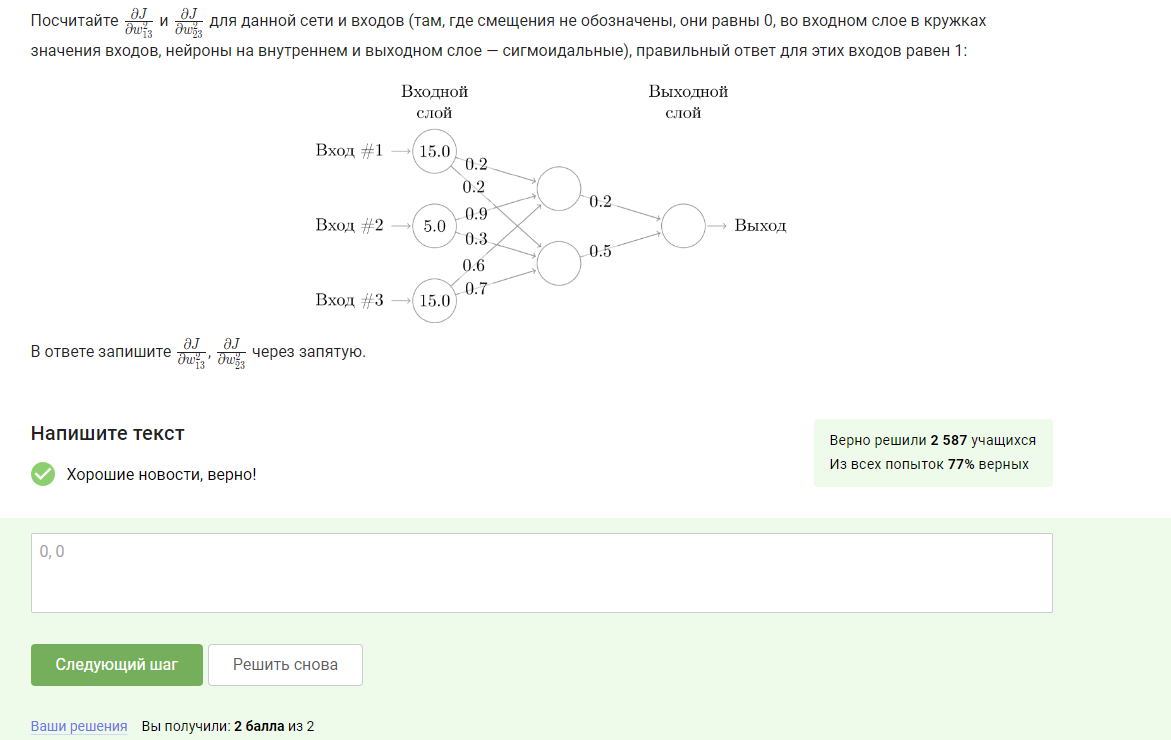

In [13]:
import numpy as np

class myNET:
    def __init__(self, x, y, w1, w2):
        self.x = x
        self.y = y
        self.w1 = w1
        self.w2 = w2
        assert self.w1.shape[-1] == self.x.shape[0], print(self.w1.shape[-1], self.x.shape[0])  
      
    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))
    
    def sigmoid_prime(self, a):
        return self.sigmoid(a) * (1 - self.sigmoid(a))
        
    def out(self):
        z1 = self.w1.dot(self.x)
        a1 = self.sigmoid(z1)
        z2 = self.w2.dot(a1)
        a2 = self.sigmoid(z2)
        J_prime_a2 = (a2 - self.y) 
        delta2 = J_prime_a2 * self.sigmoid_prime(z2)
        delta1 = self.w2.T.dot(delta2) * self.sigmoid_prime(z1)
        J_prime_w2_13 = self.x[2] * delta1[0] 
        J_prime_w2_23 = self.x[2] * delta1[1] 
        return J_prime_w2_13, J_prime_w2_23
        



In [24]:
x = np.array([15,5,15])
y = 1
w1 = np.array([[0.2,0.9,0.6] , [0.2,0.3,0.7]])
w2 = np.array([[0.2, 0.5]])

model = myNET(x, y, w1, w2)
print(model.out())

(-1.506418404811943e-08, -1.6878239245363882e-07)


In [21]:
w1

array([[0.2, 0.2, 0.9],
       [0.3, 0.6, 0.7]])

In [23]:
import numpy as np


class PrimeJwCounter:
    x = None
    y = None

    w1 = None
    w2 = None

    def __init__(self, x, y, w1, w2):
        self.x = np.array(x)
        self.y = np.array(y)

        self.w1 = np.array(w1)
        self.w2 = np.array(w2)

    def sigmoid(self, n):
        return 1 / (1 + np.exp(-n))

    def sigmoid_prime(self, n):
        return self.sigmoid(n) * (1 - self.sigmoid(n))

    def prime_j_w(self):
        z1 = self.x.dot(self.w1.T)
        a1 = self.sigmoid(z1)

        z2 = a1.dot(self.w2.T)
        a2 = self.sigmoid(z2)

        grad = (a2 - self.y)

        d2 = grad * self.sigmoid_prime(z2)
        d1 = d2.dot(self.w2) * self.sigmoid_prime(z1)

        return [self.x[0][2] * d1[0][0], self.x[0][2] * d1[0][1]]


result = PrimeJwCounter(x=[[15,5,15]], y=[[1]], w1=[[0.2,0.9,0.6] , [0.2,0.3,0.7]], w2=[[0.2, 0.5]]).prime_j_w()
print(result)

[-1.506418404811943e-08, -1.6878239245363882e-07]


In [22]:
import numpy as np


class PrimeJwCounter:
    x = None
    y = None

    w1 = None
    w2 = None

    def __init__(self, x, y, w1, w2):
        self.x = np.array(x)
        self.y = np.array(y)

        self.w1 = np.array(w1)
        self.w2 = np.array(w2)

    def sigmoid(self, n):
        return 1 / (1 + np.exp(-n))

    def sigmoid_prime(self, n):
        return self.sigmoid(n) * (1 - self.sigmoid(n))

    def prime_j_w(self):
        z1 = self.x.dot(self.w1.T)
        a1 = self.sigmoid(z1)

        z2 = a1.dot(self.w2.T)
        a2 = self.sigmoid(z2)

        grad = (a2 - self.y)

        d2 = grad * self.sigmoid_prime(z2)
        d1 = d2.dot(self.w2) * self.sigmoid_prime(z1)

        return [self.x[0][2] * d1[0][0], self.x[0][2] * d1[0][1]]


result = PrimeJwCounter(x=[[0, 1, 2]], y=[[1]], w1=[[2, 2, 2], [2, 2, 2]], w2=[[1, 1]]).prime_j_w()
print(result)

[-6.224265322988261e-05, -6.224265322988261e-05]


# ВОПРОС

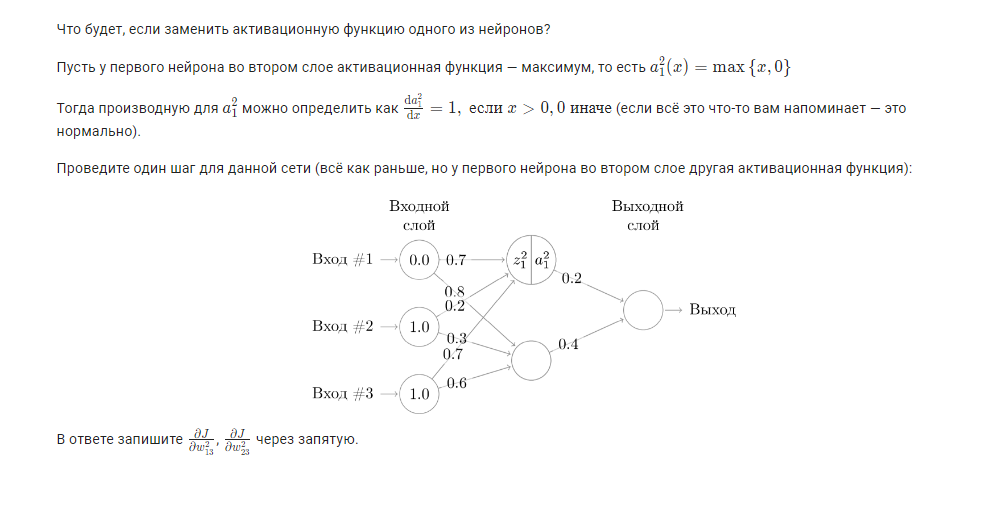

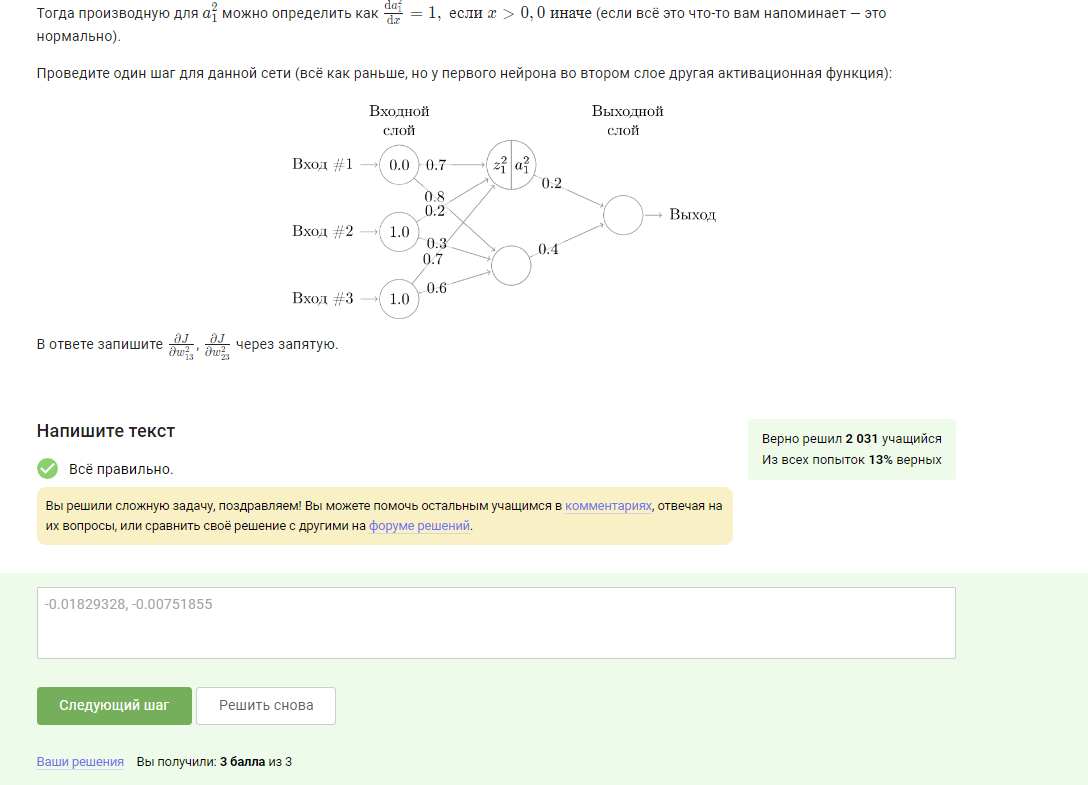

In [ ]:
# Это с предыдущего задания
import numpy as np


class PrimeJwCounter:
    x = None
    y = None

    w1 = None
    w2 = None

    def __init__(self, x, y, w1, w2):
        self.x = np.array(x)
        self.y = np.array(y)

        self.w1 = np.array(w1)
        self.w2 = np.array(w2)

    def sigmoid(self, n):
        return 1 / (1 + np.exp(-n))

    def sigmoid_prime(self, n):
        return self.sigmoid(n) * (1 - self.sigmoid(n))

    def prime_j_w(self):
        z1 = self.x.dot(self.w1.T)
        a1 = self.sigmoid(z1)

        z2 = a1.dot(self.w2.T)
        a2 = self.sigmoid(z2)

        grad = (a2 - self.y)

        d2 = grad * self.sigmoid_prime(z2)
        d1 = d2.dot(self.w2) * self.sigmoid_prime(z1)

        return [self.x[0][2] * d1[0][0], self.x[0][2] * d1[0][1]]




In [ ]:
result = PrimeJwCounter(x=[[0, 1, 1]], y=[[1]], w1=[[0.7, 0.2, 0.7], [0.8, 0.3, 0.6]], w2=[[0.2, 0.4]]).prime_j_w()
print(result)

# Это рабочие варианты

In [1]:
import numpy as np


sigma = lambda x: np.exp(x) / (1 + np.exp(x))
sigma_prime = lambda x: sigma(x) * (1 - sigma(x))

relu = np.vectorize(lambda x: x if x > 0 else 0)
relu_prime = np.vectorize(lambda x: 1 if x > 0 else 0)


xs = np.array([[0,1,1]])
ys = np.array([[1]])

ws1 = np.array([[0.7,0.2,0.7],[0.8,0.3,0.6]])
ws2 = np.array([[0.2,0.4]])

z1 = xs.dot(ws1.T)
a1 = np.hstack([relu(z1[:,0,np.newaxis]), sigma(z1[:,1,np.newaxis])])

z2 = a1.dot(ws2.T)
a2 = sigma(z2)

d2 = (a2 - ys) * sigma_prime(z2)
d1 = d2.dot(ws2) * np.hstack([relu_prime(z1[:,0,np.newaxis]), sigma_prime(z1[:,1,np.newaxis])])
d0 = d1.dot(ws1) * 1

print('{}, {}'.format(xs[0][2] * d1[0][0], xs[0][2] * d1[0][1]))


-0.018293284971249293, -0.0075185513677826785


In [3]:
import numpy as np

def sigmoid(x):
    """сигмоидальная функция, работает и с числами, и с векторами (поэлементно)"""
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    """производная сигмоидальной функции, работает и с числами, и с векторами (поэлементно)"""
    return sigmoid(x) * (1 - sigmoid(x))

def sigma_grad(z, y):
    return (sigmoid(z) - y) * sigmoid_prime(z)


A1 = np.array([0,1,1])
W2 = np.array([[0.7, 0.2, 0.7], [0.8, 0.3, 0.6]])
W3 = np.array([0.2, 0.4])


Z2 = np.dot(A1, W2.T)
A2 = sigmoid(Z2)
A2[0] = max(Z2[0], 0)
Z3 = np.dot(A2, W3.T)
A4 = sigmoid(Z3)
D3 = sigma_grad(Z3, 1)
D2=np.dot(W3.T,D3)
D2[1] *= sigmoid_prime(Z2[1])

ws = A1[2] * D2
print(ws)


[-0.01829328 -0.00751855]


In [4]:
import numpy as np

class myNET:
    def __init__(self, x, y, w1, w2):
        self.x = x
        self.y = y
        self.w1 = w1
        self.w2 = w2
        assert self.w1.shape[-1] == self.x.shape[0], print(self.w1.shape[-1], self.x.shape[0])  
      
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_prime(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))
    
    def new_activation(self, z):
        return np.max(z, 0)
    
    def new_activation_prime(self, z):
        return 1 if self.new_activation(z) > 0 else 0
        
    def out(self):
        z1 = self.w1.dot(self.x)
        
#       теперь у нас разные функции активации для первого и второго нейрона во втором слое
        a1_1 = self.new_activation(z1[0])
        a1_2 = self.sigmoid(z1[1])
        z2 = self.w2.dot([a1_1] + [a1_2])
        a2 = self.sigmoid(z2)
        J_prime_a2 = (a2 - self.y) 
        delta2 = J_prime_a2 * self.sigmoid_prime(z2)
        
#       при обратном проходе тоже берем разные активации и их производные   
        new_activations = np.array([self.new_activation_prime(z1[0]), self.sigmoid_prime(z1[1])])
        delta1 = self.w2.T.dot(delta2) * new_activations
        J_prime_w2_13 = self.x[2] * delta1[0] 
        J_prime_w2_23 = self.x[2] * delta1[1] 
        return J_prime_w2_13, J_prime_w2_23
        

x = np.array([0,1,1])
y = 1
w1 = np.array([[0.7,0.2,0.7], [0.8,0.3,0.6]])
w2 = np.array([[0.2, 0.4]])

model = myNET(x, y, w1, w2)
print(model.out())

(-0.018293284971249293, -0.0075185513677826785)


In [ ]:
import numpy as np

sigma = lambda x: np.exp(x) / (1 + np.exp(x))
sigma_prime = lambda x: sigma(x) * (1 - sigma(x))

relu = np.vectorize(lambda x : x if x > 0 else 0) # если приходит много значений на вход, векторизируем
relu_prime = np.vectorize(lambda x : 1 if x > 0 else 0) # если приходит много значений на вход, векторизируем

"входные параметры нейросети"
xs = np.array([[0,1,1]])

'отклик нейросети - верный ответ'
ys = np.array([[1]])

'инициализируем веса, ws1 - веса первого слоя, ws2 - веса второго слоя'
ws1 = np.array([[0.7,0.2,0.7],[0.8,0.3,0.6]])
ws2 = np.array([[0.2,0.4]])

'находим результат сумматорной функции первого слоя'
z1 = xs.dot(ws1.T)

'находим активации нейронов первого слоя, записываем их в общую матрицу a1 '
a1 = np.hstack([relu(z1[:,0, np.newaxis]), sigma(z1[:,1, np.newaxis])])

'находим результат сумматорной функции второго слоя'
z2 = a1.dot(ws2.T)

'находим результирующую активацию выходного слоя'
a2 = sigma(z2)

'находим ошибку на втором слое (последнем)'
d2 = (a2 -ys)* sigma_prime(z2)

'находим ошибку на первом слое'
d1 = d2.dot(ws2) * np.hstack([relu_prime(z1[:,0, np.newaxis]), sigma_prime(z1[:,1, np.newaxis])])

'находим ошибку на нулевом слое'
d0 = d1.dot(ws1)* sigma_prime(xs)

print(xs[0][2]*d1[0][0],',', end='')
print(xs[0][2]*d1[0][1])

In [ ]:
# вычисляем результат нейронной сети на входных данных

zL=(0.18+0.4*sigmoid(0.9))
aL=sigmoid(zL)

# считаем ошибку на последнем слое (3ем) по формуле первого кита

dL = np.array([[(aL-1)*sigmoid_prime(zL)]])

# считаем ошибку на втором слое по формуле первого кита 

d2=(np.array([[0.2],[0.4]])@dL)*(np.array([[1],[sigmoid_prime(0.9)]]))

# считаем частные производные на втором слое по формуле 4го кита, но поскольку вектор активаций на первом слое это входные данные, то получается что ответ такой же как и d2

In [5]:
def a_prime(x):
    if x>0:
        return 1
    return 0


input_layer= np.array([[0.0],[1.0],[1.0]])
W2=np.array([[0.7,0.2,0.7],[0.8,0.3,0.6]])
W3=np.array([[0.2,0.4]])
y=1
print('W2(shape) ',W2.shape)
print('W3(shape) ',W3.shape)
#print(W3.T)
print('input_layer(shape) ',input_layer.shape)

z2=W2.dot(input_layer)
print('z2.shape',z2.shape)
#----------------Без изменений, по сравнению с нейронкой, где все активационные функции сигмоидные
a2=sigmoid(W2.dot(input_layer))
#a2 это матрица (2,1) активация 1 нейрона, активация 2 нейрона

a2[0][0]=np.max([0,z2[0][0]])
#поменял активационную функцию для 1 нейрона 2 слоя
zL=W3.dot(a2)

aL=sigmoid(zL)
print('aL ',aL)
print('zL ',zL)

delta_L=(aL-y)*sigmoid_prime(zL)
print('delta_L ',delta_L)
#delta_L не зависит от акт. функции предыдущего слоя, а delta_l зависит
delta_l = (W3.T.dot(delta_L)*sigmoid_prime(z2))
delta_l[0][0]=W3[0][0]*delta_L*a_prime(z2[0][0])
print('delta_l(shape) ',delta_l.shape)
print('delta_l ',delta_l)

dJ_dw213=input_layer[2][0]*delta_l[0][0]
dJ_dw223=input_layer[2][0]*delta_l[1][0]

print(dJ_dw213,dJ_dw223)

W2(shape)  (2, 3)
W3(shape)  (1, 2)
input_layer(shape)  (3, 1)
z2.shape (2, 1)
aL  [[0.61405267]]
zL  [[0.4643798]]
delta_L  [[-0.09146642]]
delta_l(shape)  (2, 1)
delta_l  [[-0.01829328]
 [-0.00751855]]
-0.018293284971249293 -0.0075185513677826785
